In [159]:
import pandas as pd
import datetime as dt
import re
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_real_estate = pd.read_csv('real_estate_data.csv', sep = '\t')
df_real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

# 1. Заполнение значений и преобразование данных

## Заполнение: 


1. Меняем NaN значения в балкона на 0
Исходим из того, что если не указано наличие балкона, то его нет
2. Аналогично с признаком апартаментов, меняем на False, так как булев тип
3. Пустые значения по дням размещения меняем на 1. Ошибка в вычислении скрипта
4. аналогично, кол-во прудов  и парков в радиусе 3 км. Ошибка скрипта. Меняем на 0
5. Фильтруем строки в которых не указан город (их 49, можем пожертвовать)
Город является основной информацией для дальнейшей аналитики цены 

In [4]:
df_real_estate.loc[pd.isna(df_real_estate.balcony), 'balcony'] = 0
df_real_estate.loc[pd.isna(df_real_estate.is_apartment), 'is_apartment'] = False
df_real_estate.loc[(pd.isna(df_real_estate.days_exposition)), 'days_exposition'] = 1
df_real_estate.loc[(pd.isna(df_real_estate.ponds_around3000)), 'ponds_around3000'] = 0
df_real_estate.loc[(pd.isna(df_real_estate.parks_around3000)), 'parks_around3000'] = 0
df_real_estate = df_real_estate.drop(df_real_estate[df_real_estate.locality_name.isnull()].index, axis = 0)
#Выводим информацию по ДФ после преобразования
df_real_estate.reset_index().info()
df_real_estate.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 23650 non-null  int64  
 1   total_images          23650 non-null  int64  
 2   last_price            23650 non-null  float64
 3   total_area            23650 non-null  float64
 4   first_day_exposition  23650 non-null  object 
 5   rooms                 23650 non-null  int64  
 6   ceiling_height        14490 non-null  float64
 7   floors_total          23565 non-null  float64
 8   living_area           21752 non-null  float64
 9   floor                 23650 non-null  int64  
 10  is_apartment          23650 non-null  object 
 11  studio                23650 non-null  bool   
 12  open_plan             23650 non-null  bool   
 13  kitchen_area          21381 non-null  float64
 14  balcony               23650 non-null  float64
 15  locality_name      

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,1.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


## Приведение str названия городов значений к единому виду:

После визуального анализа необходимо: 
1. Привести все буквы к единому регистру
2. Заменить ё на е 
3. Убрать символы

Через функции

In [5]:
def normal_loc_name(loc_name):
    """
 Функция выполняет следующие действия с поданой в нее строкой:
1. Приводит все буквы к нижнему регистру
2. Заменяет ё на е
3. Убрает лишние символы
    """
    loc_name = loc_name.lower()
    loc_name = loc_name.replace('ё', 'е')
    loc_name = re.sub("[$|@|&|,|.|\"|\']", "", loc_name)
    loc_name = re.sub("городской поселок", "поселок городского типа", loc_name)
    return loc_name

In [6]:
len(df_real_estate['locality_name'].unique())

364

In [7]:
df_real_estate['locality_name'] = df_real_estate['locality_name'].apply(normal_loc_name)

In [8]:
len(df_real_estate['locality_name'].unique())

323

# 2. Изменение типов данных столбцов

Меняем на инт, так как не может быть дробного значения:  
2. balcony    
3. parks_around3000  
4. ponds_around3000
5. days_exposition       

Меняем дату публикации на формат datetime, для удобства работы

In [9]:
columns_change = ['balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']
df_real_estate[columns_change] = df_real_estate[columns_change].astype('int64')
df_real_estate['first_day_exposition'] = pd.to_datetime(df_real_estate['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
df_real_estate.info()
df_real_estate.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,1
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121


 # Посчитайте и добавьте в таблицу

1. Цену квадратного метра;
2. День недели, месяц и год публикации объявления;
3. Этаж квартиры; варианты — первый, последний, другой;
4. Соотношение жилой и общей площади, а также отношение площади кухни к общей

In [11]:
df_real_estate['price_1_m'] = round((df_real_estate.last_price / df_real_estate.total_area), 2)
df_real_estate['weekday'] = df_real_estate['first_day_exposition'].dt.day_name()
df_real_estate['month_name'] = df_real_estate['first_day_exposition'].dt.month_name()
df_real_estate['year'] = df_real_estate['first_day_exposition'].dt.year
df_real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1_m,weekday,month_name,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1,482.0,2,755.0,1,120370.37,Thursday,March,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0,NaN,0,NaN,81,82920.79,Tuesday,December,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1,90.0,2,574.0,558,92785.71,Thursday,August,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2,84.0,3,234.0,424,408176.10,Friday,July,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2,112.0,1,48.0,121,100000.00,Tuesday,June,2018


5. Этаж квартиры; варианты — первый, последний, другой

In [41]:
#Для указания этажа напишем функцию 
def what_floor(row):
    """
На вход функции подаем строку ДФ
Функция сравнивает конкртеный этаж в строке с этажностью дома в строке. 
Если этаж первый в многоэтажном доме - пишем "первый"
Если этаж последний в многоэтажном доме - пишем "последний"
Если этаж другой в многоэтажном доме - пишем "другой"
Если В значении этажности дома значение NaN - оставляем NaN
    """
    if row['floors_total'] != row['floors_total']: row['floor_type'] = np.NaN
    else:
        if row['floor'] == 1 and row['floors_total'] != 1 :
            row['floor_type'] = 'первый'
        elif row['floor'] == row['floors_total'] and row['floors_total'] != 1 :
            row['floor_type'] = 'последний'
        else :
            row['floor_type'] = 'другой'
    return row['floor_type']

In [56]:
df_real_estate['floor_type'] = df_real_estate.apply(what_floor, axis = 1)

array(['другой', 'первый', 'последний', nan], dtype=object)

In [63]:
df_real_estate['living_area_ratio'] = round(df_real_estate['living_area'] / df_real_estate['total_area'] , 2)
df_real_estate['kitchen_area_ratio'] = round(df_real_estate['kitchen_area'] / df_real_estate['total_area'] , 2)

# Строим гистограммы 

In [130]:
round(df_real_estate.describe(),2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1_m,year,living_area_ratio,kitchen_area_ratio
count,23650.00,2.365000e+04,23650.00,23650.00,14490.00,23565.00,21752.00,23650.00,21381.00,23650.00,...,18139.00,23650.00,8064.00,23650.00,9085.00,23650.00,23650.00,23650.00,21752.00,21381.00
mean,9.86,6.541127e+06,60.33,2.07,2.77,10.68,34.45,5.89,10.57,0.59,...,14197.86,0.47,490.83,0.59,518.06,156.58,99432.25,2017.37,0.56,0.19
std,5.68,1.089640e+07,35.66,1.08,1.26,6.59,22.04,4.88,5.90,0.96,...,8606.83,0.75,342.55,0.88,277.84,213.47,50337.94,1.04,0.11,0.07
min,0.00,1.219000e+04,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,...,181.00,0.00,1.00,0.00,13.00,1.00,111.83,2014.00,0.02,0.03
25%,6.00,3.400000e+06,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,...,9241.00,0.00,288.00,0.00,293.00,22.00,76614.96,2017.00,0.50,0.13
50%,9.00,4.650000e+06,52.00,2.00,2.65,9.00,30.00,4.00,9.10,0.00,...,13105.00,0.00,454.50,0.00,502.00,73.00,95000.00,2017.00,0.57,0.17
75%,14.00,6.799000e+06,69.70,3.00,2.80,16.00,42.30,8.00,12.00,1.00,...,16293.00,1.00,612.00,1.00,730.00,198.00,114274.16,2018.00,0.64,0.23
max,50.00,7.630000e+08,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,...,65968.00,3.00,3190.00,3.00,1344.00,1580.00,1907500.00,2019.00,1.00,0.79


## Предварительные выводы
Построение гистограмм без предварительных фильтров не дает визуальных результатов из-за выбросов.
Получаем 1-2 основных столбца массы значений
Применим фильтрацию значений к гистограммам

In [ ]:
%matplotlib inline

<AxesSubplot:title={'center':'Общая площадь, м.кв.'}, ylabel='Frequency'>

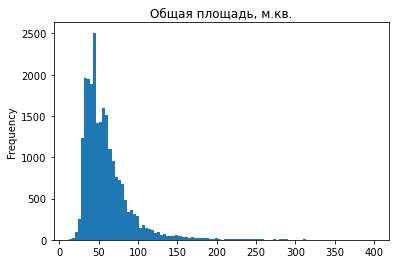

In [129]:
df_real_estate['total_area'][df_real_estate['total_area'] < 400].plot(kind = 'hist',
                                         title = 'Общая площадь, м.кв.',
                                         bins = 100)

<AxesSubplot:title={'center':'Цена, руб.'}, ylabel='Frequency'>

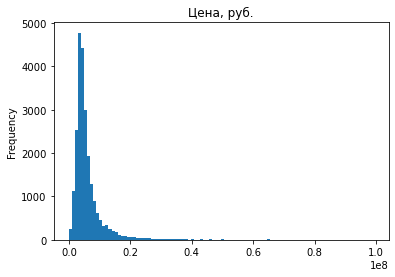

In [127]:
df_real_estate['last_price'][df_real_estate['last_price'] < 100000000].plot(kind = 'hist',
                                         title = 'Цена, руб.',
                                         bins = 100)

<AxesSubplot:title={'center':'Кол-во комнат, шт.'}, ylabel='Frequency'>

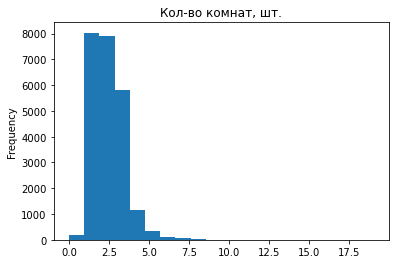

In [122]:
df_real_estate['rooms'].plot(kind = 'hist',
                                         title = 'Кол-во комнат, шт.',
                                         bins = 20)

<AxesSubplot:title={'center':'Высота потолков, см'}, ylabel='Frequency'>

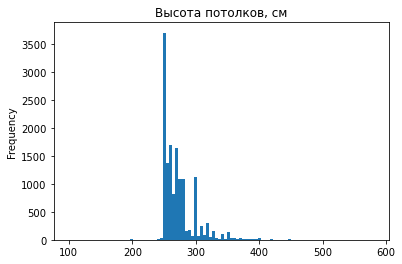

In [121]:
(df_real_estate['ceiling_height'][df_real_estate['ceiling_height'] < 6]*100).plot(kind = 'hist',
                                         title = 'Высота потолков, см',
                                         bins = 100)

## Изучите время продажи квартиры

In [131]:
df_real_estate['days_exposition'].mean()

156.5834249471459

In [132]:
df_real_estate['days_exposition'].median()

73.0

Среднее и медианое значение сильно отличаются. 
Построим гистограмму, чтобы посмотреть распределение 

<AxesSubplot:title={'center':'Кол-во дней продажи'}, ylabel='Frequency'>

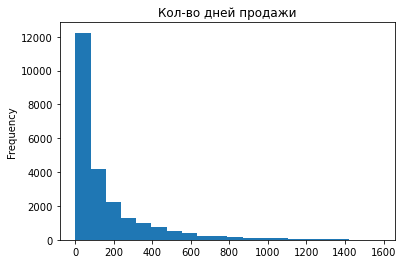

In [134]:
df_real_estate['days_exposition'].plot(kind = 'hist',
                                         title = 'Кол-во дней продажи',
                                         bins = 20)

<AxesSubplot:title={'center':'Кол-во дней продажи'}>

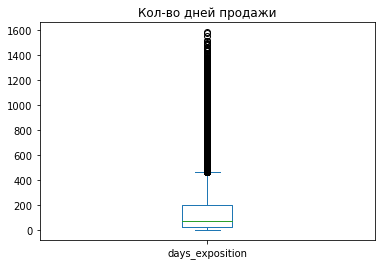

In [137]:
#Поробуем посмотреть отклонение на ящике с усами (box plot)
df_real_estate['days_exposition'].plot(kind = 'box',
                                         title = 'Кол-во дней продажи')

### Значение дней продажи более 500 считаем выбросом на основании применения box plot
#### Продажи более 500 дней - необычайно долгие продажи
Построим бокс плот для первичных значений скорости продажи (с пропущенными значениями) + посмотрим, есть ли выбросы снизу и как построится бокс  

<AxesSubplot:title={'center':'Кол-во дней продажи'}>

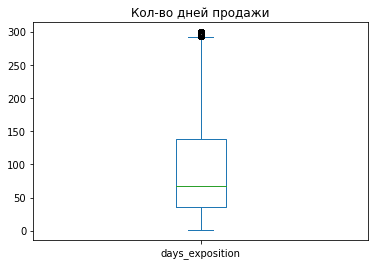

In [151]:
df_day_exp = pd.read_csv('real_estate_data.csv', sep = '\t')
df_day_exp['days_exposition'][df_day_exp['days_exposition'] < 300].plot(kind = 'box',
                                         title = 'Кол-во дней продажи')

### В обоих случаях график и выбросы выглядят практически одинаково. 

<AxesSubplot:title={'center':'Кол-во дней продажи'}, ylabel='Frequency'>

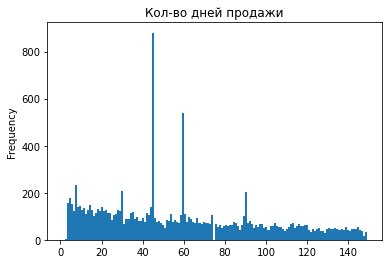

In [158]:
df_day_exp = pd.read_csv('real_estate_data.csv', sep = '\t')
df_day_exp['days_exposition'][df_day_exp['days_exposition'] < 150].plot(kind = 'hist',
                                         title = 'Кол-во дней продажи',
                                                                       bins = 150)

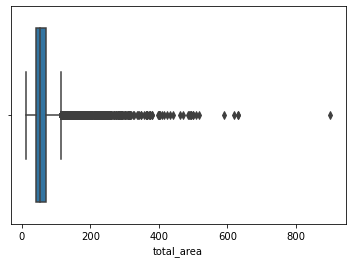

In [200]:
sns.boxplot(x = (df_real_estate['total_area']))
plt.show()

In [196]:
#фильтруем данные от выбросов по площади и кол-ву дней публикации
df_filtered = df_real_estate[(df_real_estate['total_area'] < 175) &
                            (df_real_estate['days_exposition'] < 450) &
                            (df_real_estate['ceiling_height'] < 6.1) &
                            (df_real_estate['ceiling_height'] > 1) &
                            (df_real_estate['rooms'] < 8) &
                            (df_real_estate['rooms'] > 0) &
                            (df_real_estate['last_price'] < 100000000) &
                            (df_real_estate['price_1_m'] > 10000)].reset_index()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12829 entries, 0 to 12828
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 12829 non-null  int64         
 1   total_images          12829 non-null  int64         
 2   last_price            12829 non-null  float64       
 3   total_area            12829 non-null  float64       
 4   first_day_exposition  12829 non-null  datetime64[ns]
 5   rooms                 12829 non-null  int64         
 6   ceiling_height        12829 non-null  float64       
 7   floors_total          12822 non-null  float64       
 8   living_area           12123 non-null  float64       
 9   floor                 12829 non-null  int64         
 10  is_apartment          12829 non-null  object        
 11  studio                12829 non-null  bool          
 12  open_plan             12829 non-null  bool          
 13  kitchen_area    

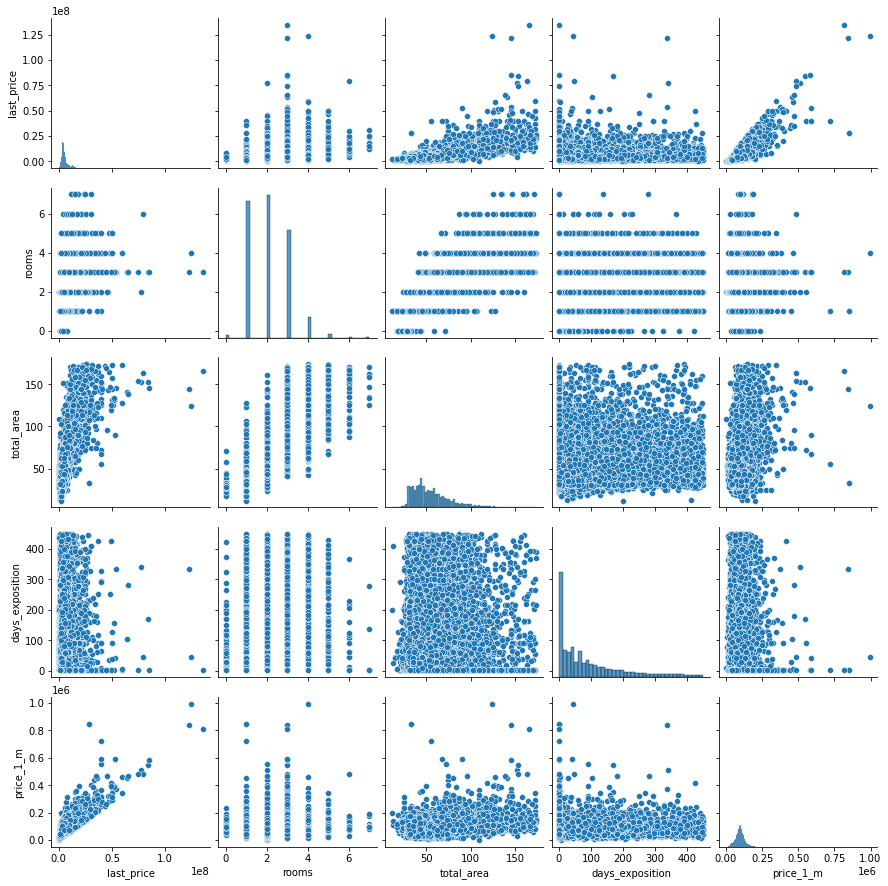

In [184]:
sns.pairplot(df_filtered[['last_price', 'rooms', 'total_area', 'days_exposition', 'price_1_m']])
plt.show()

In [189]:
len(df_filtered['rooms'][df_filtered['rooms'] == 0])

0

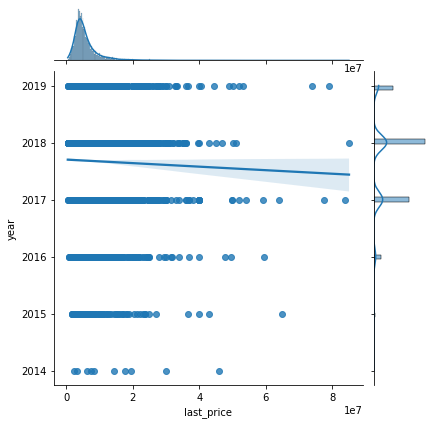

In [197]:
sns.jointplot(x ='last_price', y = 'year', data = df_filtered, kind = 'reg')

In [204]:
df_filtered['last_price'].describe()

count    1.282900e+04
mean     6.049604e+06
std      4.906866e+06
min      4.500000e+05
25%      3.550000e+06
50%      4.800000e+06
75%      6.800000e+06
max      8.500000e+07
Name: last_price, dtype: float64

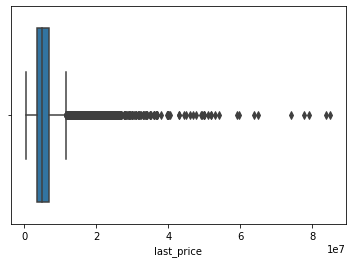

In [203]:
sns.boxplot(x = (df_filtered['last_price']))
plt.show()

In [231]:
f_max = df_real_estate[['total_area', 'last_price','ceiling_height', 'rooms','price_1_m']].quantile([0.75]) *1.5
f_min = df_real_estate[['total_area', 'last_price','ceiling_height', 'rooms','price_1_m']].quantile([0.25]) /1.5
f_max

,total_area,last_price,ceiling_height,rooms,price_1_m
0.75,104.55,10198500.0,4.2,4.5,171411.24


In [230]:
df_fil = df_real_estate[df_real_estate[['total_area', 'last_price','ceiling_height', 'rooms','price_1_m']] < f_max ]

ValueError: Can only compare identically-labeled DataFrame objects